In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("pokemon.csv")

In [14]:
df.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [ ]:
df.drop(["#", "Name", "Type 1", "Type 2"], axis=1, inplace= True)
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,False
1,405,60,62,63,80,80,60,1,False
2,525,80,82,83,100,100,80,1,False
3,309,39,52,43,60,50,65,1,False
4,405,58,64,58,80,65,80,1,False


In [17]:
legend_map = {
    True: 1,
    False : 0
    }
df["Legendary"] = df["Legendary"].map(legend_map)

In [18]:
df.head(3)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,0
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0


In [19]:
#Başlayalım

X = df.drop("Legendary", axis=1)
y = df["Legendary"]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [23]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model = LogisticRegression()

log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [27]:
test_pred = log_model.predict(scaled_X_test)

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

In [29]:
accuracy_score(test_pred, y_test)

0.968609865470852

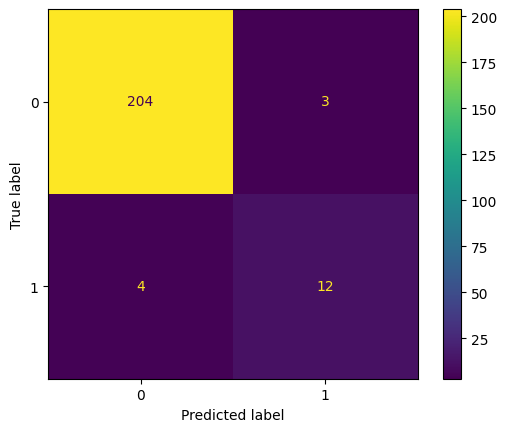

In [30]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [31]:
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       208
           1       0.75      0.80      0.77        15

    accuracy                           0.97       223
   macro avg       0.87      0.89      0.88       223
weighted avg       0.97      0.97      0.97       223



In [32]:
# Deneme

wrong = (test_pred != y_test)
wrong_df = pd.DataFrame(wrong)

In [ ]:
wrong_df[wrong_df["Legendary"] == True] 
# Bunlar hatalı bulduklarımız

,Legendary
667,True
649,True
489,True
737,True
725,True
651,True
646,True


In [36]:
df.loc[[725, 651]]

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
725,600,90,100,70,110,150,80,6,0
651,580,91,90,72,90,129,108,5,1


In [37]:
denek_poke1 = [[600, 90, 100, 70, 110, 150, 80, 6]]
scaled_denek_poke1 = scaler.transform(denek_poke1)

log_model.predict(scaled_denek_poke1)

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [39]:
log_model.predict_proba(scaled_denek_poke1)[0, 1] * 100

59.992537874670674

In [40]:
# 580	91	90	72	90	129	108	5	1
denek_poke2 = [[580, 91, 90, 72, 90, 129, 108, 5]]
scaled_denek_poke2 = scaler.transform(denek_poke2)

log_model.predict(scaled_denek_poke2)

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [42]:
log_model.predict_proba(scaled_denek_poke2)[0, 1] * 100

37.29880209037558